In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

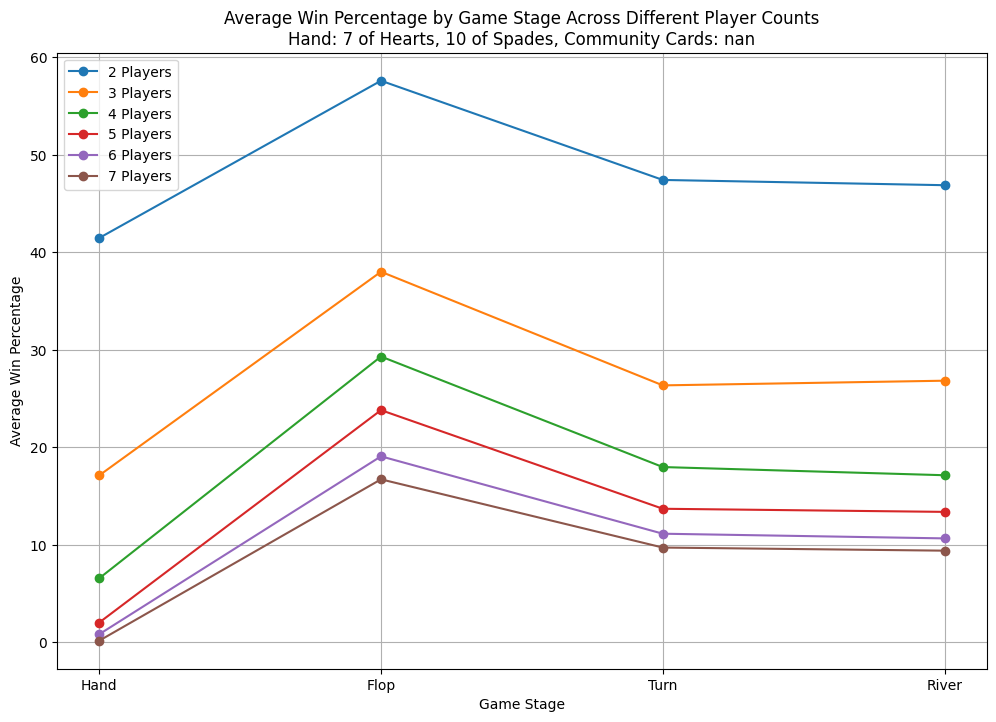

In [9]:
def plot_average_win_percentages():
    plt.figure(figsize=(12, 8))
    player_counts = []
    averages_list = []

    # Assume that the hand and community card information is the same across all simulations
    hand_description = ''
    community_cards_description = ''

    # Gather all CSV files and calculate the average win percentages
    csv_files = [f for f in os.listdir('.') if f.startswith('stats_') and f.endswith('_players.csv')]
    for file_name in csv_files:
        data = pd.read_csv(file_name)
        averages = data.iloc[:, 1:5].mean().tolist()
        num_players = int(file_name.split('_')[1])
        player_counts.append(num_players)
        averages_list.append(averages)
        
        # Take the hand and community cards description from the first row of the first file
        if not hand_description or not community_cards_description:
            hand_description = data.iloc[0]['Player Hand']
            community_cards_description = data.iloc[0]['Community Cards']

    # Plot the averages for each player count
    for count, averages in zip(player_counts, averages_list):
        plt.plot(['Hand', 'Flop', 'Turn', 'River'], averages, marker='o', label=f'{count} Players')

    plt.xlabel('Game Stage')
    plt.ylabel('Average Win Percentage')
    title = 'Average Win Percentage by Game Stage Across Different Player Counts'
    if hand_description and community_cards_description:
        title += f'\nHand: {hand_description}, Community Cards: {community_cards_description}'
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_average_win_percentages()